## K-Nearest Neighbor Classifier from scratch

### Name:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Example 1 Data:

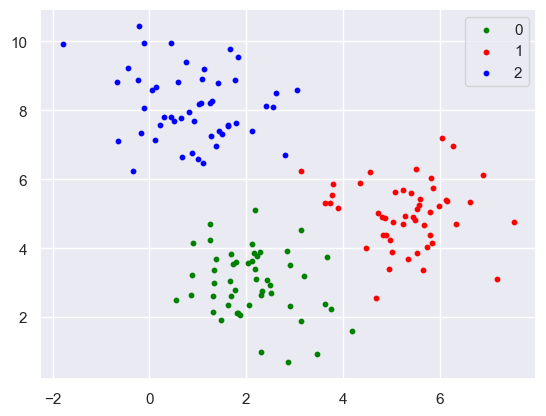

In [2]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [1, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, centers=np.array(centers),random_state=1)

colours = ('green', 'red', 'blue')
n_classes = 3


fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

ax.legend(loc='upper right');

## Creating the learnset

In [3]:
from sklearn.model_selection import train_test_split

Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(data,labels,test_size=0.2,random_state=42)

## KNN class 

In [4]:
from scipy import stats

class KNN():
    
    def __init__(self, k=3):
        self.k = k # the number of nearest neighbores 
        self.Xtrain = None
        self.ytrain = None
        
    def distance (self,x1,x2):
        return np.sqrt(np.sum(x1-x2)**2)
    
    def fit (self, X,y):
        self.Xtrain = X
        self.ytrain = y
        
    def predict(self, X):
        results = np.zeros(len(X))
        for i in range(len(X)):
            points_dist = []
            for j in range(len(self.ytrain)):
                points_dist.append([self.distance(X[i], self.Xtrain[j]), self.ytrain[j]])
            points_dist = sorted(points_dist, key=lambda x: x[0])
            groups = [[0, 0], [1, 0], [2, 0]]
            for n in range(self.k):
                if points_dist[n][1] == 0:
                    groups[0][1] += 1
                if points_dist[n][1] == 1:
                    groups[1][1] += 1
                if points_dist[n][1] == 2:
                    groups[2][1] += 1
            results[i] = (sorted(groups, key = lambda x: x[1])[2][0])
        return results

In [5]:
model = KNN(k=5)
model.fit(Xtrain1, ytrain1)
preds = model.predict(Xtest1)
print(preds.astype(int))
print(ytest1)

[2 2 1 2 1 1 1 2 1 1 1 1 2 0 1 1 0 2 2 0 1 1 1 0 0 0 0 0 1 0]
[2 2 1 2 1 1 1 1 2 1 1 1 2 0 1 1 2 1 2 0 2 1 2 0 0 2 0 0 1 0]


## Accuracy

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest1, preds)

0.7666666666666667

## Example 2 Data:

In [7]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target 

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = KNN()
model.fit(Xtrain2, ytrain2)
preds = model.predict(Xtest2)

print(accuracy_score(ytest2, preds))

0.9298245614035088


## Determining the Optimal k Value
Plot the accuracy as function of k. Find the optimal value of k

In [9]:
accuracy_arr = np.zeros(10)
n = 0
for k in range(1,20,2):
    model = KNN(k=k)
    model.fit(Xtrain2, ytrain2)
    preds = model.predict(Xtest2)
    accuracy_arr[n] = accuracy_score(ytest2, preds)
    n+=1

In [10]:
accuracy_arr.max()

0.9415204678362573

## Plot

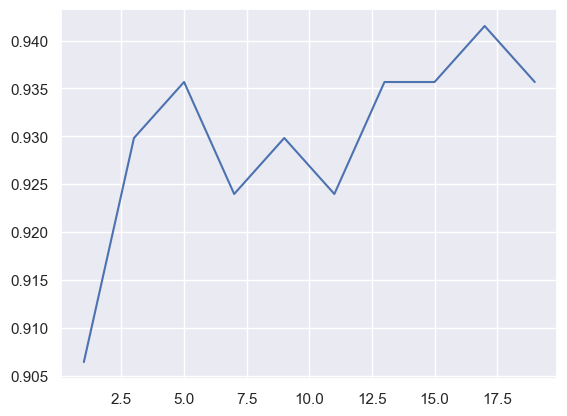

In [11]:
plt.plot([k for k in range(1, 20, 2)], accuracy_arr)

## Using Scikit-Learn

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtrain2, ytrain2) 

predicted = knn.predict(Xtest2)
print(accuracy_score(ytest2, predicted))

0.9590643274853801
